In [353]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks


# If the CSV file is in Google Drive
# df = pd.read_csv('/content/drive/MyDrive/path/to/your/file.csv')

# If the CSV file is uploaded directly to Colab
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PPG_Signal/p040412.csv')  # Replace 'file.csv' with the path to your CSV file
print(df.head())  # Display the first few rows of the DataFrame

sys = df['Mean_NBP_Sys'].values
dia = df['Mean_NBP_Dias'].values

print(sys, ' / ', dia)

columns_to_remove = ['Mean_NBP_Sys', 'Mean_NBP_Dias']
cleaned_df = df.drop(columns=columns_to_remove)

print(cleaned_df.head())

          0         1         2         3         4         5         6  \
0  2.142717  2.073314  2.001955  1.935484  1.876833  1.827957  1.789834   

          7         8         9  ...      4192      4193      4194      4195  \
0  1.761486  1.740958  1.727273  ...  1.799609  1.807429  1.793744  1.761486   

       4196      4197      4198      4199  Mean_NBP_Sys  Mean_NBP_Dias  
0  1.725318  1.684262  1.643206  1.600196    125.381074      75.268068  

[1 rows x 4202 columns]
[125.38107362]  /  [75.26806773]
          0         1         2         3         4         5         6  \
0  2.142717  2.073314  2.001955  1.935484  1.876833  1.827957  1.789834   

          7         8         9  ...      4190      4191      4192      4193  \
0  1.761486  1.740958  1.727273  ...  1.765396  1.783969  1.799609  1.807429   

       4194      4195      4196      4197      4198      4199  
0  1.793744  1.761486  1.725318  1.684262  1.643206  1.600196  

[1 rows x 4200 columns]


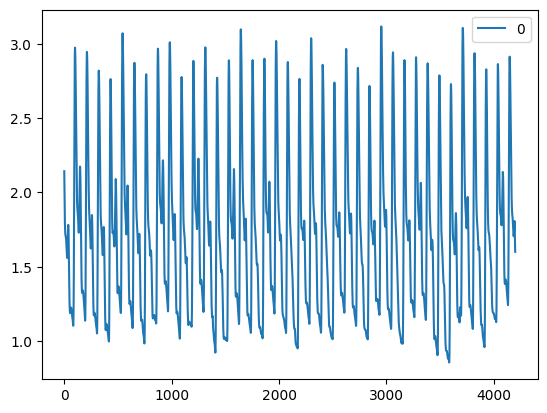

In [354]:
# Transpose the DataFrame
transposed_df = cleaned_df.T

# Plot a line graph of the transposed DataFrame
transposed_df.plot(kind='line')

# Display the plot
plt.show()

In [355]:
def find_peaks_in_data(data):
    """
    Find peaks in the data and plot them.

    Parameters:
    - data: DataFrame or Series with one row or transposed DataFrame

    Returns:
    - peaks: Dictionary containing indices and corresponding values of peaks
    """
    # Convert DataFrame or Series to numpy array
    values = data.values.flatten() if isinstance(data, pd.DataFrame) else data.values

    # Find peaks in the data
    peaks, _ = find_peaks(values)

    # Plot the data and highlight the peaks
    plt.plot(values, label='Data')
    plt.plot(peaks, values[peaks], 'ro', label='Peaks')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.title('Peaks in Data')
    plt.legend()
    plt.show()

    # Return peaks as a dictionary containing indices and corresponding values
    peaks_dict = {'indices': peaks, 'values': values[peaks]}

    # Create a DataFrame containing peak values
    peak_values_df = pd.DataFrame({'Index': peaks, 'Value': values[peaks]})

    return peaks_dict, peak_values_df

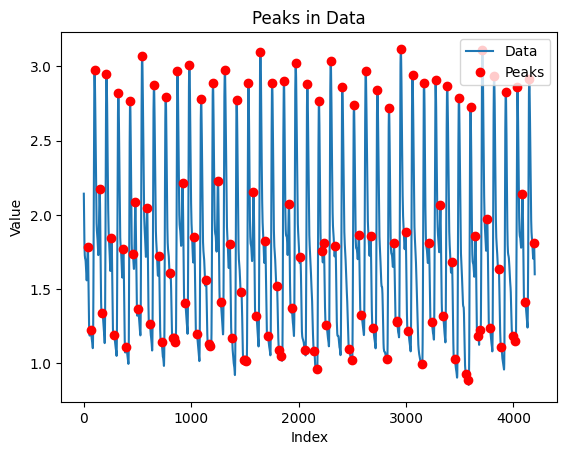

{'indices': array([  37,   63,  100,  147,  172,  211,  257,  282,  321,  368,  394,
        431,  455,  479,  505,  543,  589,  614,  653,  699,  724,  763,
        807,  833,  837,  849,  872,  919,  944,  983, 1028, 1052, 1093,
       1138, 1164, 1173, 1203, 1249, 1275, 1313, 1359, 1382, 1423, 1467,
       1494, 1498, 1511, 1533, 1580, 1605, 1644, 1689, 1713, 1754, 1798,
       1822, 1835, 1863, 1909, 1935, 1973, 2016, 2058, 2081, 2145, 2170,
       2190, 2215, 2234, 2258, 2299, 2343, 2406, 2470, 2495, 2515, 2561,
       2585, 2625, 2670, 2695, 2734, 2820, 2842, 2888, 2912, 2919, 2952,
       2996, 3020, 3061, 3146, 3168, 3213, 3239, 3276, 3320, 3344, 3384,
       3425, 3454, 3493, 3563, 3577, 3601, 3647, 3673, 3685, 3711, 3756,
       3780, 3821, 3864, 3887, 3929, 4000, 4013, 4038, 4084, 4111, 4148,
       4193]), 'values': array([1.78201369, 1.22482893, 2.97458456, 2.17399804, 1.34115347,
       2.94623656, 1.84750733, 1.18963832, 2.82013685, 1.76735093,
       1.11339198, 2.76344

In [356]:
peaks, peak_values_df = find_peaks_in_data(transposed_df)
print(peaks)
print(peak_values_df)

In [357]:
def filter_peak_values(peak_values_df, threshold=1.5):
    """
    Filter peak_values_df to remove values below the specified threshold.

    Parameters:
    - peak_values_df: DataFrame containing peak values
    - threshold: float, minimum value required to keep a value (default: 1.5)

    Returns:
    - filtered_peak_values_df: DataFrame with values below threshold removed
    """
    filtered_df = peak_values_df[peak_values_df['Value'] >= threshold]
    return filtered_df


# Example usage
filtered_df = filter_peak_values(peak_values_df)
print(filtered_df)


     Index     Value
0       37  1.782014
2      100  2.974585
3      147  2.173998
5      211  2.946237
6      257  1.847507
..     ...       ...
114   3929  2.828935
117   4038  2.864125
118   4084  2.137830
120   4148  2.913978
121   4193  1.807429

[72 rows x 2 columns]


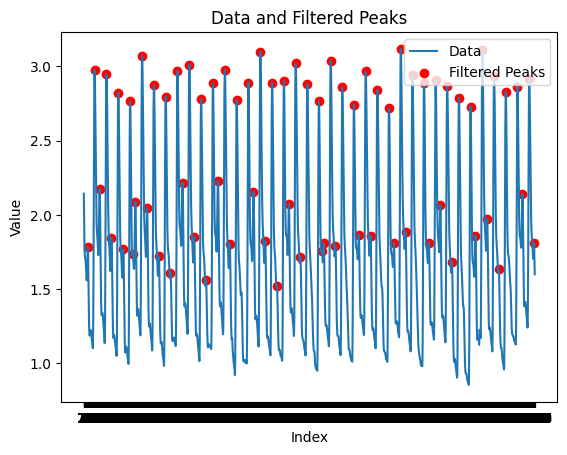

In [358]:
# Plot transposed_df as a line plot
plt.plot(transposed_df.index, transposed_df.values.flatten(), label='Data')

# Plot filtered_df as a scatter plot with dots
plt.scatter(filtered_df['Index'], filtered_df['Value'], color='red', label='Filtered Peaks')

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Data and Filtered Peaks')
plt.legend()

# Show plot
plt.show()


In [363]:
def split_values_high_low(filtered_df, threshold=2.5):
    """
    Split values in filtered_df into two arrays based on the specified threshold for high values.

    Parameters:
    - filtered_df: DataFrame containing filtered values
    - threshold: float, minimum value required to be considered as high (default: 0.6)

    Returns:
    - high_values: list of high values (greater than or equal to threshold)
    - low_values: list of low values (less than threshold)
    """
    high_values = []
    low_values = []

    for value in filtered_df['Value']:
        if value >= threshold:
            high_values.append(value)
            low_values.append(None)  # Placeholder for low value
        else:
            high_values.append(None)  # Placeholder for high value
            low_values.append(value)

    return high_values, low_values



high_values, low_values = split_values_high_low(filtered_df)
print(high_values)
print(low_values)


[None, 2.9745845552297165, None, 2.946236559139785, None, 2.820136852394917, None, 2.763440860215054, None, None, 3.071358748778104, None, 2.8729227761485827, None, 2.795698924731183, None, 2.967741935483871, None, 3.010752688172043, None, 2.777126099706745, None, 2.8856304985337244, None, 2.9765395894428157, None, 2.7722385141739982, 2.889540566959922, None, 3.0977517106549364, None, 2.8905180840664717, None, 2.900293255131965, None, 3.0195503421309877, None, 2.877810361681329, 2.764418377321604, None, None, 3.038123167155425, None, 2.859237536656892, 2.739980449657869, None, 2.9657869012707723, None, 2.838709677419355, 2.716520039100684, None, 3.117302052785924, None, 2.943304007820137, 2.8905180840664717, None, 2.9100684261974585, None, 2.8690127077223853, None, 2.787878787878788, 2.729227761485826, None, 3.10752688172043, None, 2.9374389051808407, None, 2.8289345063538613, 2.8641251221896384, None, 2.913978494623656, None]
[1.7820136852394917, None, 2.1739980449657867, None, 1.8475

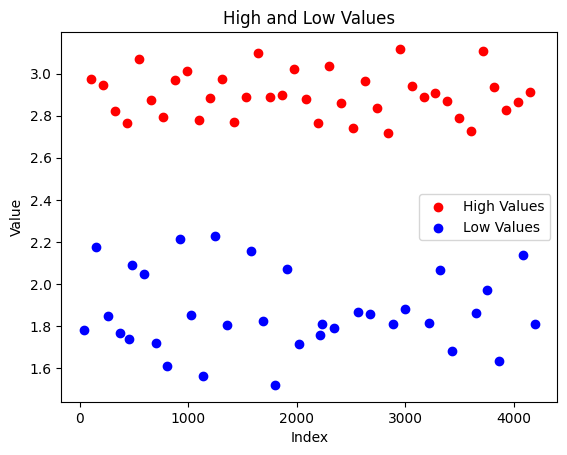

In [364]:
# Plot high values
plt.scatter(filtered_df['Index'], high_values, color='red', label='High Values')

# Plot low values
plt.scatter(filtered_df['Index'], low_values, color='blue', label='Low Values')

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('High and Low Values')
plt.legend()

# Show plot
plt.show()


In [365]:
# Calculate the average of high values
average_high = np.mean([value for value in high_values if value is not None])

# Calculate the average of low values
average_low = np.mean([value for value in low_values if value is not None])

print("Average High Value:", average_high)
print("Average Low Value:", average_low)



Average High Value: 2.8982096002469517
Average Low Value: 1.86708642401242


In [366]:
# Scale down to 0-1
def scale_down(a, min_val_orig=0, max_val_orig=4, min_val_scale=0, max_val_scale=1):

    scaled_value = min_val_scale + (a - min_val_orig) * (max_val_scale - min_val_scale) / (max_val_orig - min_val_orig)
    return scaled_value

In [367]:
scaled_average_high = scale_down(average_high)
scaled_average_low = scale_down(average_low)
print("Scaled value of", average_high, ":", scaled_average_high)
print("Scaled value of", average_low, ":", scaled_average_low)

Scaled value of 2.8982096002469517 : 0.7245524000617379
Scaled value of 1.86708642401242 : 0.466771606003105
